<a href="https://colab.research.google.com/github/HusseinShatnawi/Python-homeworks-/blob/main/Q1_Final_exam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# StudentName = Hussein Shatnawi
# CWID = 50305640
# Final Exam Solutions

# Q1 :
"""
Every company that has a subscriber-based model (Netflix, ATT, Verizon,
DirectTV etc.) may face a loss in subscribers over time. This factor is usually
used to gauge the health of the company, and thereby profits and growth
depend on it. Thus, such companies need to understand why customers are
lost and when and where to ‘fix’ this loss of customers.
In this problem, we want to build a model to predict how likely is a customer to
cancel their LionPhone mobile phone service plan. In the Excel file, data is
grouped according to whether a given customer cancels the services or not.
Using the given data, write Python code to solve the following sub-parts:
"""


# 1) Clean the data to prepare for data analysis. (Hint: Check for missing
# data, check for outliers, modify the textual columns to numerical ones
# (e.g., as 1 or 0), use the replace(np.nan, 0) and fillna(0) functions
# where appropriate, etc.)



# Solution : 

# Here we start by importing the reqired libraries and install the unistalled ones to make sure that we can use the more methods and tools

!pip install mglearn         # here we install mglearn library since it's not installed by defualt in Google Colab
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn             # here we import mglearn library
import matplotlib.pyplot as plt

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5ede742d2b709a3e7d901d1103eb690e00ba4e3b4ed12e0e0f9ec45bd10ad205
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# **Importing the data and apply the data cleaning procedures to increase the models accuracy **

In [4]:
df = pd.read_excel('/content/Exam_Q1 (1).xlsx')                       # Importing the data as data frame 
df

,CancelOrNo,CustomerWeeks,RenewOrNo,HaveData,DataUse,TechSuppCalls,DMins,DCalls,ChargePerMonth,OverFee,RoamingMins
0,No Cancel,128.0,Renew,1,2.70,1.0,265.1,110.0,89.0,9.87,10.0
1,No Cancel,107.0,Renew,1,3.70,1.0,161.6,123.0,82.0,9.78,13.7
2,No Cancel,137.0,Renew,0,0.00,0.0,243.4,114.0,52.0,6.06,12.2
3,No Cancel,84.0,No Renew,0,0.00,2.0,299.4,71.0,57.0,3.10,6.6
4,No Cancel,75.0,No Renew,0,0.00,3.0,166.7,113.0,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,No Cancel,192.0,Renew,1,2.67,2.0,156.2,77.0,71.7,10.78,9.9
3329,No Cancel,68.0,Renew,0,0.34,3.0,231.1,57.0,56.4,7.67,9.6
3330,No Cancel,28.0,Renew,0,0.00,2.0,180.8,109.0,56.0,14.44,14.1
3331,No Cancel,184.0,No Renew,0,0.00,2.0,213.8,105.0,50.0,7.98,5.0


In [355]:
df.info()                                     # To have a veiw for the data and understand it


# We see here there are only two columns have complete data set while all the others have missing data !!
# So after leaning data we need to double check it again 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CancelOrNo      3332 non-null   object 
 1   CustomerWeeks   3332 non-null   float64
 2   RenewOrNo       3332 non-null   object 
 3   HaveData        3333 non-null   int64  
 4   DataUse         3333 non-null   float64
 5   TechSuppCalls   3332 non-null   float64
 6   DMins           3331 non-null   float64
 7   DCalls          3332 non-null   float64
 8   ChargePerMonth  3330 non-null   float64
 9   OverFee         3330 non-null   float64
 10  RoamingMins     3330 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 286.6+ KB


In [356]:
df.describe()                                  # To have a look on data and undersatnd it 

,CustomerWeeks,HaveData,DataUse,TechSuppCalls,DMins,DCalls,ChargePerMonth,OverFee,RoamingMins
count,3332.000000,3333.000000,3333.000000,3332.000000,3.331000e+03,3332.000000,3330.000000,3330.000000,3330.000000
mean,101.080132,0.276628,0.816475,1.562425,5.503515e+02,100.433974,56.307057,10.050108,10.239580
std,39.818251,0.447398,1.272668,1.315453,2.138777e+04,20.071865,16.432057,2.535048,2.792048
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,1.000000,1.436500e+02,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,0.000000,1.000000,1.794000e+02,101.000000,53.550000,10.070000,10.300000
75%,127.000000,1.000000,1.780000,2.000000,2.166000e+02,114.000000,66.275000,11.770000,12.100000
max,243.000000,1.000000,5.400000,9.000000,1.234567e+06,165.000000,111.300000,18.190000,20.000000


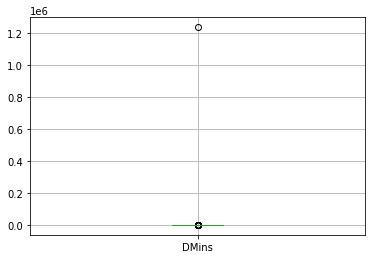

In [357]:
df.boxplot(column = 'DMins');                       # Just to have an indication about the outliers 

In [358]:
# To fully understand our data we shall check the important features of the data frame like:

# -Null values 
# -Missing values 
# -Duplicated values 
# -OutliersList_Indecies
# -Dummy variables 
# -Determine the dependent and independents variables 
# -Data frame descriptions and informations agian





df.isnull().sum()     # here we check the null values in each column

CancelOrNo        1
CustomerWeeks     1
RenewOrNo         1
HaveData          0
DataUse           0
TechSuppCalls     1
DMins             2
DCalls            1
ChargePerMonth    3
OverFee           3
RoamingMins       3
dtype: int64

In [14]:
df.duplicated().sum()                   # To check the dupicates

0

In [130]:
# here I created a dictionary includes the each column and the index of the null value ( in case of exist)
columnName = list(df.columns)       # list that includes all columns 
dic= {}                             # defining the dictionary 
for column in columnName :          # loop to detec each column and it's NAN values
  column_null_index = df[df[column].isnull()].index.tolist()           # list that contains all NAN indecies 
  dic[column] = column_null_index                                      # Adding the indecies to the created dictionary 
  
dic

# WE NOTE HERE THERE ARE FIVE DIFFERENT ROWS CONTAIN NAN VALUES 

{'CancelOrNo': [1726],
 'ChargePerMonth': [1826, 1859, 1860],
 'CustomerWeeks': [1726],
 'DCalls': [1826],
 'DMins': [1826, 1847],
 'DataUse': [],
 'HaveData': [],
 'OverFee': [1826, 1859, 1860],
 'RenewOrNo': [1726],
 'RoamingMins': [1826, 1859, 1860],
 'TechSuppCalls': [1826]}

In [131]:

# I have two different procedures to remove the null values ; the first one is drop all rows that have null values 
# ( Five rows and it is accepted since there are more than 3000 rows ).
# The second procedure is to replace the null values in columns those contain the numerical Values
# and drop the rows those contains null values in the categorical columns 


# I will drop all rows those contain the null values 

In [183]:
df_dropedAll = df.dropna()                        # To drop the null values in all rows
df_dropedAll

,CancelOrNo,CustomerWeeks,RenewOrNo,HaveData,DataUse,TechSuppCalls,DMins,DCalls,ChargePerMonth,OverFee,RoamingMins
0,No Cancel,128.0,Renew,1,2.70,1.0,265.1,110.0,89.0,9.87,10.0
1,No Cancel,107.0,Renew,1,3.70,1.0,161.6,123.0,82.0,9.78,13.7
2,No Cancel,137.0,Renew,0,0.00,0.0,243.4,114.0,52.0,6.06,12.2
3,No Cancel,84.0,No Renew,0,0.00,2.0,299.4,71.0,57.0,3.10,6.6
4,No Cancel,75.0,No Renew,0,0.00,3.0,166.7,113.0,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,No Cancel,192.0,Renew,1,2.67,2.0,156.2,77.0,71.7,10.78,9.9
3329,No Cancel,68.0,Renew,0,0.34,3.0,231.1,57.0,56.4,7.67,9.6
3330,No Cancel,28.0,Renew,0,0.00,2.0,180.8,109.0,56.0,14.44,14.1
3331,No Cancel,184.0,No Renew,0,0.00,2.0,213.8,105.0,50.0,7.98,5.0


In [184]:
# here I replace the categorical values with numerical values (0 & 1 ) since it is a mandatory step to complete the machince learning and the analysis

# I have two procedures to replace these values : 1- by using numpy arrays and deal with each column as an array , then change the values as required 
# 2 - using pandas GET_DUMMIES function .

# here I will start with numpy array procedure


df_dropedAll['CancelOrNo'] = np.where(df_dropedAll['CancelOrNo'] == 'Cancel', 0, 1)
df_dropedAll['RenewOrNo'] = np.where(df_dropedAll['RenewOrNo'] == 'No Renew', 0, 1)
df_dropedAll.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


(3328, 11)

In [185]:
df_dropedAll

,CancelOrNo,CustomerWeeks,RenewOrNo,HaveData,DataUse,TechSuppCalls,DMins,DCalls,ChargePerMonth,OverFee,RoamingMins
0,1,128.0,1,1,2.70,1.0,265.1,110.0,89.0,9.87,10.0
1,1,107.0,1,1,3.70,1.0,161.6,123.0,82.0,9.78,13.7
2,1,137.0,1,0,0.00,0.0,243.4,114.0,52.0,6.06,12.2
3,1,84.0,0,0,0.00,2.0,299.4,71.0,57.0,3.10,6.6
4,1,75.0,0,0,0.00,3.0,166.7,113.0,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,1,192.0,1,1,2.67,2.0,156.2,77.0,71.7,10.78,9.9
3329,1,68.0,1,0,0.34,3.0,231.1,57.0,56.4,7.67,9.6
3330,1,28.0,1,0,0.00,2.0,180.8,109.0,56.0,14.44,14.1
3331,1,184.0,0,0,0.00,2.0,213.8,105.0,50.0,7.98,5.0


In [172]:
# The second procedure to rplace the dummy values by using the pd.get_dummies command

In [173]:
# To apply data analysis approaches we should convert the categorical values to numerical values ( 0 & 1 system)

# df_DummiesTable1 = pd.get_dummies(df_dropedAll['RenewOrNo'])     # we create the new table for the dummy varaibles ( X variable (RenewOrNo))
# df_DummiesTable2 = pd.get_dummies(df_dropedAll['CancelOrNo'], columns='Cancel')    # we create the new table for the dummy variables ()y variable (CancelOrNo)
# df_DummiesTable1

In [174]:
# here we concatinate the dummy variables to the data frame that we have by using concat from pandas 


# df_droped_halfDummies = pd.concat([df_DummiesTable1, df_dropedAll.iloc[:,:]],axis =1)               # here we concatinate the first dummy table
# df_droped_noDummies = pd.concat([df_DummiesTable2, df_droped_halfDummies.iloc[:,:]], axis = 1)   # here we concatinate the second dummy table
# df_droped_noDummies

In [175]:
# df_droped_noDummies = df_droped_noDummies.drop(['RenewOrNo'], axis =1) # then we drop the original columns for these dummy variables ( the column which contains the text values)
# df_droped_noDummies = df_droped_noDummies.drop(['CancelOrNo'], axis= 1)

In [176]:
# df_droped_noDummies  

In [177]:
df_dropedAll.isnull().sum()  # double check for the new data frame 

CancelOrNo        0
CustomerWeeks     0
RenewOrNo         0
HaveData          0
DataUse           0
TechSuppCalls     0
DMins             0
DCalls            0
ChargePerMonth    0
OverFee           0
RoamingMins       0
dtype: int64

In [178]:
df_dropedAll.info()           # As we can see there is no missing values and all the comlumns have the same number of rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CancelOrNo      3328 non-null   int64  
 1   CustomerWeeks   3328 non-null   float64
 2   RenewOrNo       3328 non-null   int64  
 3   HaveData        3328 non-null   int64  
 4   DataUse         3328 non-null   float64
 5   TechSuppCalls   3328 non-null   float64
 6   DMins           3328 non-null   float64
 7   DCalls          3328 non-null   float64
 8   ChargePerMonth  3328 non-null   float64
 9   OverFee         3328 non-null   float64
 10  RoamingMins     3328 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 312.0 KB


In [179]:
df_dropedAll.shape

(3328, 11)

In [143]:
# There are many procedures to determine the outliers; like the interquartile range, 
# Or the Emprical Theory (99 % of data lay in range of 3 standard deviations from the mean )

# After determining the outliers we can replace them by the mean or we can drop them 

# I applied the interquartile method and I dropped the outliers 

In [165]:
Q1 = df_dropedAll.quantile(0.25)     # to determine the first quartile 
Q3 = df_dropedAll.quantile(0.75)     # to determine the third quartile
InterQuartileRange = Q3-Q1                           # to find the inter-quartile 
lowerBoundry = Q1 - (1.5 * InterQuartileRange)       # to find the lower limit
UpperBoundry = Q3 + (1.5 * InterQuartileRange)       # to find the upper limit

df_finalCopy= df_dropedAll[~((df_dropedAll < lowerBoundry) |(df_dropedAll > UpperBoundry)).any(axis=1)]

df_finalCopy



,CancelOrNo,CustomerWeeks,RenewOrNo,HaveData,DataUse,TechSuppCalls,DMins,DCalls,ChargePerMonth,OverFee,RoamingMins
0,1,128.0,1,1,2.70,1.0,265.1,110.0,89.0,9.87,10.0
1,1,107.0,1,1,3.70,1.0,161.6,123.0,82.0,9.78,13.7
2,1,137.0,1,0,0.00,0.0,243.4,114.0,52.0,6.06,12.2
11,1,74.0,1,0,0.34,0.0,187.7,127.0,49.4,8.17,9.1
12,1,168.0,1,0,0.00,1.0,128.8,96.0,31.0,5.25,11.2
...,...,...,...,...,...,...,...,...,...,...,...
3326,1,96.0,1,0,0.36,1.0,106.6,128.0,46.6,14.24,14.9
3327,1,79.0,1,0,0.00,2.0,134.7,98.0,40.0,9.49,11.8
3328,1,192.0,1,1,2.67,2.0,156.2,77.0,71.7,10.78,9.9
3329,1,68.0,1,0,0.34,3.0,231.1,57.0,56.4,7.67,9.6


In [164]:
df_finalCopy .shape

(2422, 11)

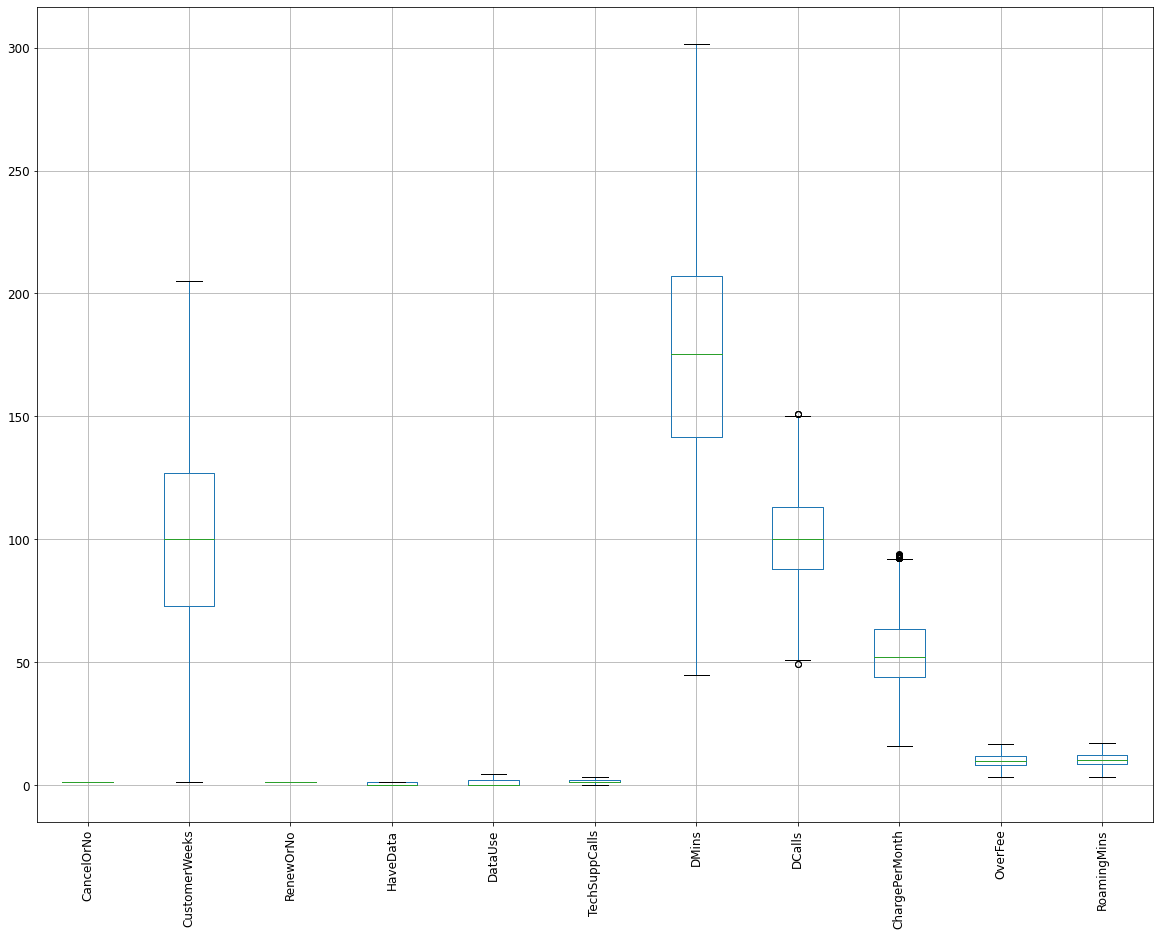

In [166]:
df_finalCopy.boxplot(fontsize= 12, rot= 90, figsize=(20,15));                 # as we can see there is no outliers any more !!

In [189]:
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(df_finalCopy[['CustomerWeeks','RenewOrNo', 'HaveData', 'DataUse', 'TechSuppCalls',
                                                      'DMins', 'DCalls', 'ChargePerMonth', 'OverFee', 'RoamingMins']],
                                                    df_finalCopy[['CancelOrNo']],  train_size= 0.7, test_size= 0.3,random_state= 12345)






train_accuracy = []                     # here we create empty list to append the train accuracies 
test_accuracy = []                      # here we  create empty list to append the test accuracies 
test_settings = range(1,12)             # this is the range through which the test set will be trained 

for n_neigh in test_settings:                                     # For loop to train the model regarding to the range which we assigned 
  modelfit = KNeighborsClassifier(n_neighbors = n_neigh)          # the model name is modelfit and here we assigned it 
  modelfit.fit(X_train, Y_train)                                  # to fit the data
  train_accuracy.append(modelfit.score(X_train, Y_train))         # to check the accuracies and append them on the training set
  test_accuracy.append(modelfit.score(X_test, Y_test))            #to check the accuracies and append them on the test set

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

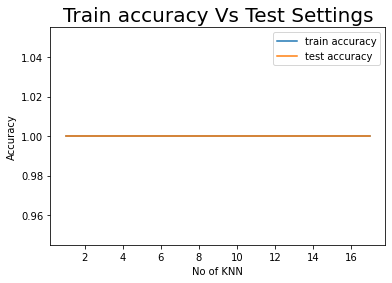

In [155]:
plt.plot(test_settings, train_accuracy, label = 'train accuracy')      # to drow the train and test accuracies on one drawing
plt.plot(test_settings, test_accuracy, label = 'test accuracy')
plt.title('Train accuracy Vs Test Settings', fontsize = 20)            # to assign name and the font size
plt.xlabel('No of KNN')                                                # X axis label
plt.ylabel('Accuracy')                                                 # Y axes label 
plt.legend();                                                          # to merge the two drawings in one drawing 


**Q1 ) part 2 & 3**

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

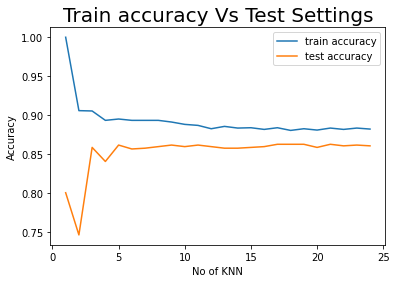

In [190]:
# here we note the model is overfitting and the accuracy is 100% and this scenario is rejected 

# So I will use the data frame before removing the outliers 

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(df_dropedAll[['CustomerWeeks','RenewOrNo', 'HaveData', 'DataUse', 'TechSuppCalls',
                                                      'DMins', 'DCalls', 'ChargePerMonth', 'OverFee', 'RoamingMins']],
                                                    df_dropedAll[['CancelOrNo']],  train_size= 0.7, test_size= 0.3,random_state= 12345)






train_accuracy = []                     # here we create empty list to append the train accuracies 
test_accuracy = []                      # here we  create empty list to append the test accuracies 
test_settings = range(1,25)             # this is the range through which the test set will be trained 

for n_neigh in test_settings:                                     # For loop to train the model regarding to the range which we assigned 
  modelfit = KNeighborsClassifier(n_neighbors = n_neigh)          # the model name is modelfit and here we assigned it 
  modelfit.fit(X_train, Y_train)                                  # to fit the data
  train_accuracy.append(modelfit.score(X_train, Y_train))         # to check the accuracies and append them on the training set
  test_accuracy.append(modelfit.score(X_test, Y_test))            #to check the accuracies and append them on the test set





plt.plot(test_settings, train_accuracy, label = 'train accuracy')      # to drow the train and test accuracies on one drawing
plt.plot(test_settings, test_accuracy, label = 'test accuracy')
plt.title('Train accuracy Vs Test Settings', fontsize = 20)            # to assign name and the font size
plt.xlabel('No of KNN')                                                # X axis label
plt.ylabel('Accuracy')                                                 # Y axes label 
plt.legend();                                                          # to merge the two drawings in one drawing 







# Q1) part 3 Accuracy numbers and highest K number

# So here we note the model can be trained and reach the highest accuracy can be reached at K = 5, and after K= 5 and the improvment of model accuracy is not signigicant improved

In [187]:
modelfit = KNeighborsClassifier(n_neighbors=5)
modelfit.fit(X_train, Y_train)
print("Train set accuracy: ", modelfit.score(X_train, Y_train))
print("Test set accuracy: ", modelfit.score(X_test, Y_test))

Train set accuracy:  0.8929376408715252
Test set accuracy:  0.8633633633633634


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Here we note the Adj. R-squared is high enough to say that we have significant clue the model is valid 

In [191]:
import statsmodels.api as sm                                
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(Y_train, X_train)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             CancelOrNo   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              1527.
Date:                Sun, 08 May 2022   Prob (F-statistic):                        0.00
Time:                        17:38:01   Log-Likelihood:                         -767.70
No. Observations:                2329   AIC:                                      1555.
Df Residuals:                    2319   BIC:                                      1613.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

# Q1) Part 4 Logestic regression 

In [205]:
# Here we appying the logestic regression to priduct the model 





from sklearn.linear_model import LogisticRegression                        # import the logistic regression method


# Then we need to split the data into train set for dependent and the independent vairiables and test set for both as well 
X_train,X_test, Y_train, Y_test = train_test_split(df_dropedAll[['CustomerWeeks','RenewOrNo', 'HaveData', 'DataUse', 'TechSuppCalls',
                                                      'DMins', 'DCalls', 'ChargePerMonth', 'OverFee', 'RoamingMins']],
                                                    df_dropedAll['CancelOrNo'],  train_size = 0.7, test_size= 0.3,random_state= 12345)


train_accuracy = []
test_accuracy = []
test_settings = range(1,7)


for iteratation in test_settings:
  logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
  logreg.fit(X_train, Y_train)
  train_accuracy.append(logreg.score(X_train, Y_train))
  test_accuracy.append(logreg.score(X_test, Y_test))

print("Train set accuracy: ", logreg.score(X_train, Y_train))
print("Test set accuracy: ", logreg.score(X_test, Y_test))

Train set accuracy:  0.866895663374839
Test set accuracy:  0.8438438438438438


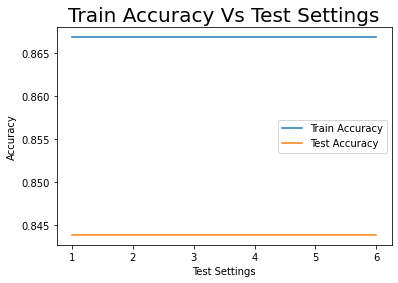

In [206]:
plt.plot(test_settings, train_accuracy, label = 'Train Accuracy')
plt.plot(test_settings, test_accuracy, label = 'Test Accuracy')
plt.title('Train Accuracy Vs Test Settings', fontsize = 20)
plt.xlabel('Test Settings')
plt.ylabel('Accuracy')
plt.legend();

In [207]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test, Y_train, Y_test = train_test_split(df_dropedAll[['CustomerWeeks','RenewOrNo', 'HaveData', 'DataUse', 'TechSuppCalls',
                                                      'DMins', 'DCalls', 'ChargePerMonth', 'OverFee', 'RoamingMins']],
                                                    df_dropedAll['CancelOrNo'],  train_size = 0.7, test_size= 0.3,random_state= 12345)


train_accuracy = []
test_accuracy = []
treeDepth = range(1,12)



for iteratation in treeDepth:
  treeMod = DecisionTreeClassifier(max_depth=iteratation, random_state=10)
  treeMod.fit(X_train, Y_train)
  train_accuracy.append(treeMod.score(X_train, Y_train))
  test_accuracy.append(treeMod.score(X_test, Y_test))


print("Train set accuracy: ", treeMod.score(X_train, Y_train))
print("Test set accuracy: ", treeMod.score(X_test, Y_test))







Train set accuracy:  0.978531558608845
Test set accuracy:  0.9009009009009009


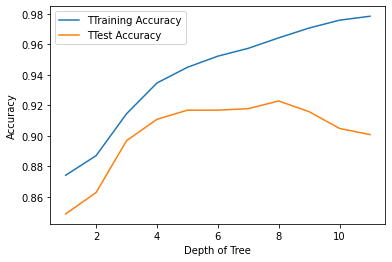

In [208]:
plt.plot(treeDepth, train_accuracy, label = "TTraining Accuracy")
plt.plot(treeDepth, test_accuracy, label = "TTest Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Depth of Tree")
plt.legend();

[Text(0.6817498907342657, 0.9583333333333334, 'DMins <= 263.25\ngini = 0.243\nsamples = 2329\nvalue = [329, 2000]\nclass = y[1]'),
 Text(0.4404228583916084, 0.875, 'TechSuppCalls <= 3.5\ngini = 0.191\nsamples = 2171\nvalue = [232, 1939]\nclass = y[1]'),
 Text(0.22962194055944055, 0.7916666666666666, 'RenewOrNo <= 0.5\ngini = 0.141\nsamples = 2007\nvalue = [153, 1854]\nclass = y[1]'),
 Text(0.07342657342657342, 0.7083333333333334, 'RoamingMins <= 13.1\ngini = 0.473\nsamples = 188\nvalue = [72, 116]\nclass = y[1]'),
 Text(0.06643356643356643, 0.625, 'OverFee <= 16.16\ngini = 0.356\nsamples = 151\nvalue = [35, 116]\nclass = y[1]'),
 Text(0.05944055944055944, 0.5416666666666666, 'DCalls <= 49.5\ngini = 0.345\nsamples = 149\nvalue = [33, 116]\nclass = y[1]'),
 Text(0.05244755244755245, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = y[0]'),
 Text(0.06643356643356643, 0.4583333333333333, 'DMins <= 236.7\ngini = 0.333\nsamples = 147\nvalue = [31, 116]\nclass = y[1]'),
 T

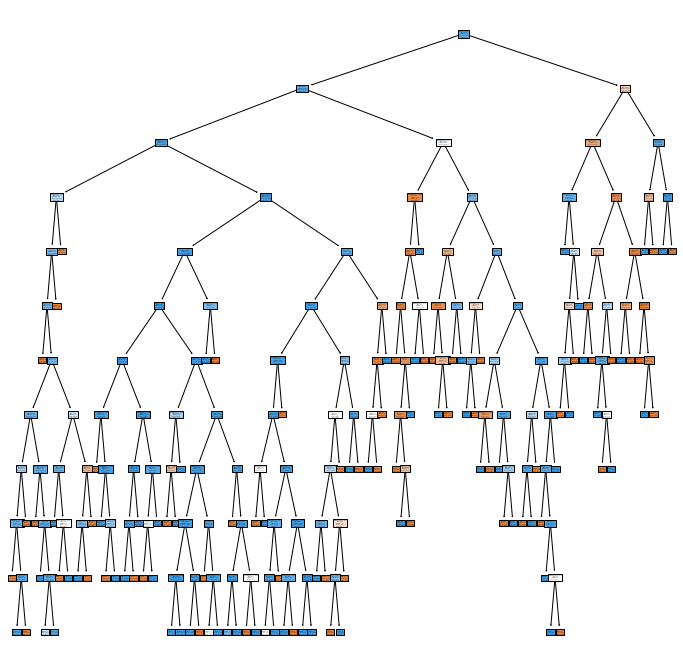

In [209]:
 # plot tree


from sklearn import tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(treeMod, feature_names=['CustomerWeeks','RenewOrNo', 'HaveData', 'DataUse', 'TechSuppCalls','DMins', 'DCalls', 'ChargePerMonth', 'OverFee', 'RoamingMins'],
class_names=True, filled=True)